In [225]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

def reactDiffV(U, V, dt, dh, nt, Dv, F, k):
    for n in range(nt):
        Vn = V.copy()
        Un = U.copy()
        
        V[1:-1,1:-1] = Vn[1:-1,1:-1] + (Dv *\
                (dt/dh**2 * (Vn[2:,1:-1] - 2*Vn[1:-1,1:-1] + Vn[:-2,1:-1])) +\
                (dt/dh**2 * (Vn[1:-1,2:] - 2*Vn[1:-1,1:-1] + Vn[1:-1,:-2]))) +\
                dt * Un[1:-1,1:-1] * ((Vn[1:-1,1:-1])**2) - (F+k) * dt * Vn[1:-1,1:-1]
            
        #Neumann BCs
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        V[0,:] = V[1,:]
        V[:,0] = V[:,1]
      
    return V

In [227]:
def reactDiffU(U, V, dt, dh, nt, Du, F):
    for n in range(nt):
        Vn = V.copy()
        Un = U.copy()
        U[1:-1,1:-1] = Un[1:-1,1:-1] + Du *\
                ((dt/dh**2 * (Un[2:,1:-1] - 2*Un[1:-1,1:-1] + Un[:-2,1:-1])) +\
                (dt/dh**2 * (Un[1:-1,2:] - 2*Un[1:-1,1:-1] + Un[1:-1,:-2]))) -\
                (dt * Un[1:-1,1:-1] * ((Vn[1:-1,1:-1])**2)) + (F * dt * (1-Un[1:-1,1:-1]))
         
    
         #Neumann BCs
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        U[0,:] = U[1,:]
        U[:,0] = U[:,1]
        
    return U

In [228]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5./(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

uvinitial = numpy.load('uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

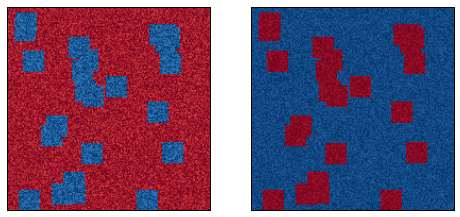

In [229]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [230]:
Y = reactDiffU(U.copy(), V.copy(), dt, dh, nt, Du, F)
Z = reactDiffV(U.copy(), V.copy(), dt, dh, nt, Dv, F, k)

In [231]:
Z

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

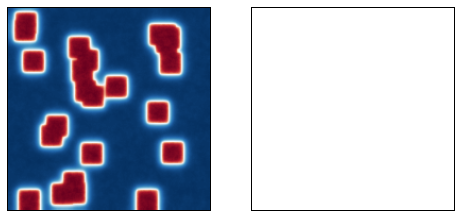

In [205]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(Y, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(Z, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [94]:
nt


8301

In [147]:
Y[100,::40]

array([ nan,  nan,  nan,  nan,  nan])

In [172]:
Z[100,::40]

array([ 0.97648548,  0.83809589,  0.92652161,  0.97342802,  0.95913066])

In [132]:
dt

0.9636865765741071

In [161]:
U

array([[ 1.03341932,  1.00909902,  1.03523907, ...,  1.01236   ,
         1.02769296,  1.01185515],
       [ 1.02049366,  1.03874603,  1.03186003, ...,  1.00917594,
         1.00648275,  1.01929723],
       [ 1.0297385 ,  1.02874589,  1.02488765, ...,  1.0345737 ,
         1.00195443,  1.03189674],
       ..., 
       [ 1.03851006,  1.01833226,  1.00260628, ...,  1.00514165,
         1.04292736,  1.0090857 ],
       [ 1.03951143,  1.0425582 ,  1.03609776, ...,  1.00643229,
         1.04094253,  1.03869138],
       [ 1.01132752,  1.00554757,  1.00241105, ...,  1.04435044,
         1.02683595,  1.01239924]])

In [162]:
Ui = U.copy()

In [163]:
Ui

array([[ 1.03341932,  1.00909902,  1.03523907, ...,  1.01236   ,
         1.02769296,  1.01185515],
       [ 1.02049366,  1.03874603,  1.03186003, ...,  1.00917594,
         1.00648275,  1.01929723],
       [ 1.0297385 ,  1.02874589,  1.02488765, ...,  1.0345737 ,
         1.00195443,  1.03189674],
       ..., 
       [ 1.03851006,  1.01833226,  1.00260628, ...,  1.00514165,
         1.04292736,  1.0090857 ],
       [ 1.03951143,  1.0425582 ,  1.03609776, ...,  1.00643229,
         1.04094253,  1.03869138],
       [ 1.01132752,  1.00554757,  1.00241105, ...,  1.04435044,
         1.02683595,  1.01239924]])

In [168]:
Y

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])